# Loading Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer as si
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

# Importing Data

In [4]:
#Importing the data
final_data = pd.read_excel(r'E:\Strikers_performance.xlsx',header=0)
final_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


# Data Cleaning And MAnipulation

### Finding And Dealing With Missing Values

In [5]:
missing_values = final_data.isnull().sum()
missing_values

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [6]:
empty_values_columns = {'Movement off the Ball','Penalty Success Rate', 'Big Game Performance'}

imputer = si(strategy='median')
for column in empty_values_columns:
    imputer.fit(final_data[[column]])
    final_data[[column]] = imputer.transform(final_data[[column]])

In [7]:
missing_values_2 = final_data.isnull().sum()
missing_values_2

Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

### Checking For Datatypes And Correcting Datatypes

In [8]:
final_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [9]:
num_columns = {'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball', 'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution', 'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'}
for column in num_columns:
    final_data[column] = final_data[column].astype(int)

In [10]:
final_data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [11]:
final_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6


# Exploratory Data Analysis

### Descriptive Analysis

In [12]:
data_description = round(final_data.describe(),2)
data_description

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


### Frequency Analysis

In [13]:
freq_footedness = final_data['Footedness'].value_counts()
perc_footedness = (freq_footedness/len(final_data['Footedness']))*100
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

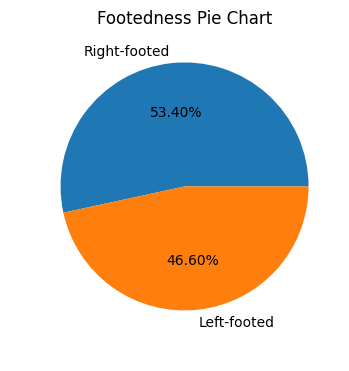

In [14]:
plt.figure(figsize=(4,6))
perc_footedness.plot(kind = 'pie' , autopct = '%1.2f%%' )
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Footedness Pie Chart')
plt.show()

### What is the distribution of players' footedness across different nationalities?

In [15]:
footedness_by_nationality = pd.crosstab(final_data['Nationality'], final_data['Footedness'])
footedness_by_nationality

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


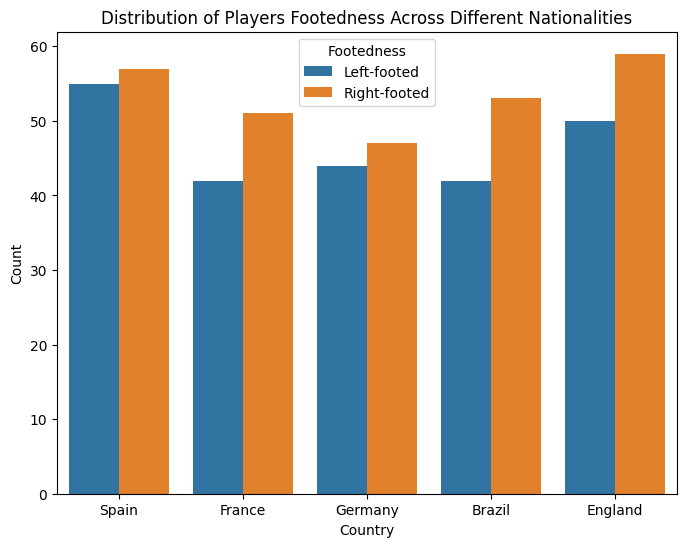

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(x='Nationality' , hue = 'Footedness'  , data = final_data)
plt.title('Distribution of Players Footedness Across Different Nationalities')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Which nationality strikers have the highest average number of goals scored?

In [17]:
groupby_analysis = round(final_data.groupby('Nationality')['Goals Scored'].mean())
groupby_analysis

Nationality
Brazil     15.0
England    14.0
France     14.0
Germany    14.0
Spain      15.0
Name: Goals Scored, dtype: float64

### What is the average conversion rate for players based on their footedness?

In [18]:
groupby_analysis_2 = final_data.groupby('Footedness')['Conversion Rate'].mean()
groupby_analysis_2

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

### Correlation Matrix And Heat Map

In [19]:
num_variables = final_data.select_dtypes(include = ['number']).columns

correl_matrix = round(final_data[num_variables].corr(), 3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


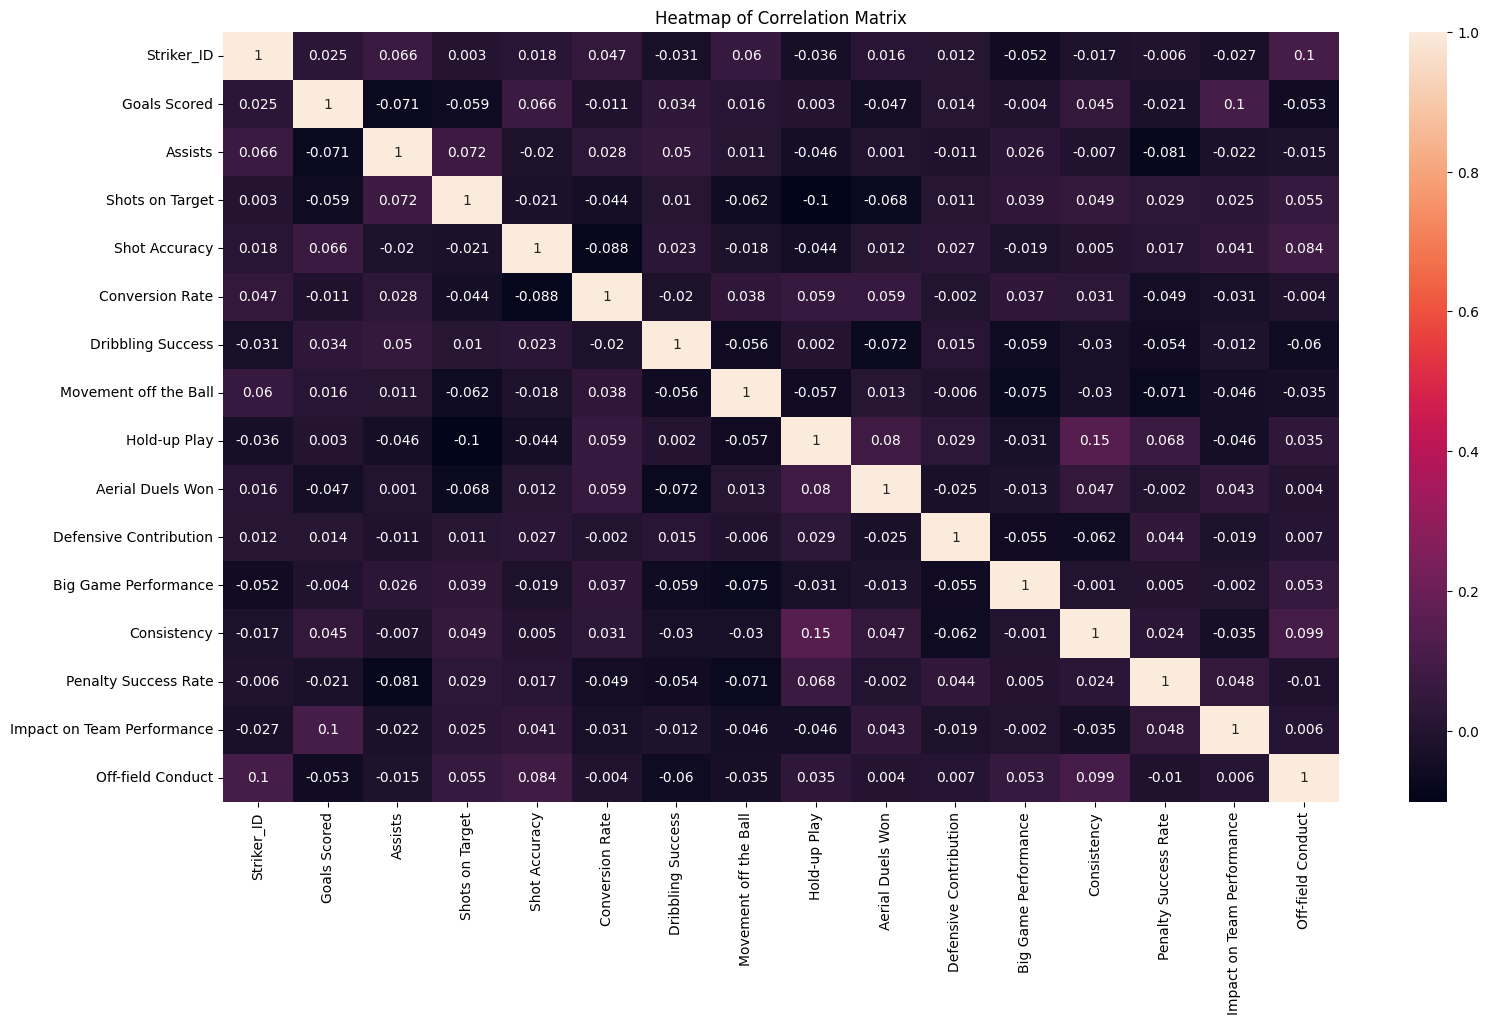

In [20]:
plt.figure(figsize=(18, 10))
sns.heatmap(correl_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Statistical Tests

### Find whether there is any significant difference in consistency rates among strikers from various nationality

In [21]:
# Normality Test 
from scipy.stats import shapiro
shapiro_results = {}
stat,p_value = shapiro(final_data['Consistency'])
shapiro_results['Consistency'] = round(p_value,3)
shapiro_results

{'Consistency': np.float64(0.451)}

In [22]:
# Filtering Data
spain = final_data.query('Nationality == "Spain"')['Consistency']
germany = final_data.query('Nationality == "Germany"')['Consistency']
france = final_data.query('Nationality == "France"')['Consistency']
brazil = final_data.query('Nationality == "Brazil"')['Consistency']
england = final_data.query('Nationality == "England"')['Consistency']

In [23]:
# Levene Test for one way ANOVA
from scipy.stats import levene
statss , p_value2 = levene(spain,france,germany,england,brazil)
print('P-Value:',p_value2)

P-Value: 0.8083990350934653


In [24]:
# Performing One way ANOVA
t_statistic , p_value3 = stats.f_oneway(spain,france,germany,england,brazil)
print('P-Value:',p_value3)

P-Value: 0.19278675901599154


### Check if there is any significant correlation between strikers' Hold-up play and consistency rate

In [25]:
# Normality Test
stat,p_value4 = shapiro(final_data['Hold-up Play'])
shapiro_results['Hold-up Play'] = round(p_value4,3)
shapiro_results

{'Consistency': np.float64(0.451), 'Hold-up Play': np.float64(0.151)}

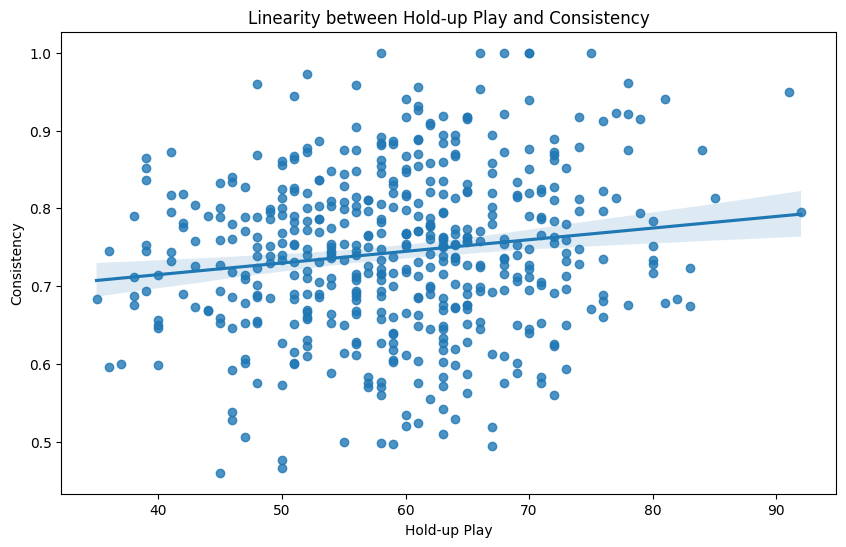

In [26]:
# Linearity test
plt.figure(figsize = (10, 6))
sns.regplot(x = 'Hold-up Play', y = 'Consistency', data = final_data)
plt.title('Linearity between Hold-up Play and Consistency')
plt.xlabel('Hold-up Play')
plt.ylabel('Consistency')
plt.show()

In [27]:
# Pearson Correlation 
correl_between = final_data[['Consistency','Hold-up Play']].corr()
round(correl_between,3)

,Consistency,Hold-up Play
Consistency,1.000,0.147
Hold-up Play,0.147,1.000


### Check if strikers' hold-up play significantly influences their consistency rate

In [28]:
# Normality Test
stat,p_value5 = shapiro(final_data['Conversion Rate'])
shapiro_results['Conversion Rate'] = round(p_value5,3)
shapiro_results

{'Consistency': np.float64(0.451),
 'Hold-up Play': np.float64(0.151),
 'Conversion Rate': np.float64(0.994)}

In [29]:
x = final_data['Hold-up Play']
y = final_data['Consistency']

x_constant = sm.add_constant(x)
model = sm.OLS(y, x_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Mon, 10 Mar 2025   Prob (F-statistic):            0.00101
Time:                        21:36:09   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

# Feature Engineering

### Create a new feature - Total contribution score

In [30]:
final_data['TotalContributionScore'] = final_data['Assists'] + final_data['Goals Scored'] + final_data['Shots on Target'] + final_data['Dribbling Success'] +final_data['Aerial Duels Won'] + final_data['Defensive Contribution'] + final_data['Big Game Performance'] + final_data['Consistency'] 

### Encode the Footedness and marital status by LabelEncoder

In [31]:
encoder = LabelEncoder()
final_data['Marital Status_en'] = encoder.fit_transform(final_data['Marital Status'])
final_data['Footedness_en'] = encoder.fit_transform(final_data['Footedness'])

### Create the dummies for Nationality and add with the data

In [32]:
dummies = pd.get_dummies(final_data[['Nationality']])
final_data = pd.concat([final_data,dummies],axis=1)

# Cluster Analysis 

In [33]:
# Preparing Data
x = final_data.drop(['Striker_ID', 'Footedness' ,'Marital Status', 'Nationality'], axis = 1)

In [34]:
# Checking WCSS Values
wcss = []
for i in range (1,15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++')
    kmeans.fit(x)
    wcss_values = kmeans.inertia_
    wcss.append(wcss_values)

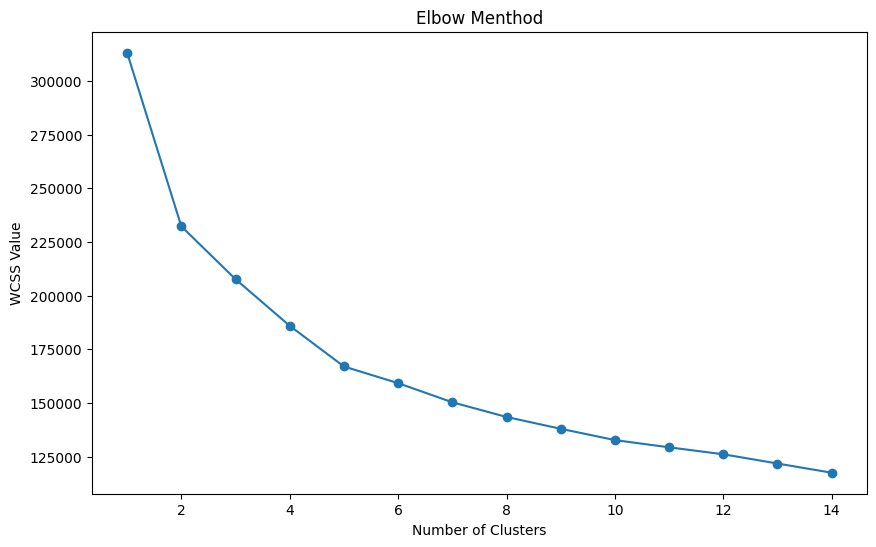

In [35]:
# Selecting WCSS Values Based On Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1,15), wcss , marker = 'o')
plt.title('Elbow Menthod')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [36]:
# KMeans Model based on selected value of k (2) 
kmeans_final = KMeans(n_clusters = 2)
kmeans_final.fit(x)
# Generating Labels
labels = kmeans_final.labels_
final_data['Clusters'] = labels

In [37]:
# Checking Clusters
grouped = round(final_data.groupby('Clusters')[['TotalContributionScore']].mean() , 2)
grouped 


,TotalContributionScore
Clusters,
0,123.39
1,101.90


In [38]:
# Assigning Meaningful Names
mapping = {0:'Best Strikers',1:'Regular Strikers'}
final_data['Striker Type'] = final_data['Clusters'].map(mapping)
# Dropping Clusters
final_data = final_data.drop('Clusters',axis=1)
final_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Off-field Conduct,TotalContributionScore,Marital Status_en,Footedness_en,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Striker Type
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,...,11,113.577376,0,0,False,False,False,False,True,Regular Strikers
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,...,8,110.600139,1,0,False,False,True,False,False,Regular Strikers
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,...,9,94.433410,0,0,False,False,False,True,False,Regular Strikers
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,...,8,124.250575,0,1,False,False,True,False,False,Best Strikers
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,...,6,107.293123,1,0,False,False,True,False,False,Regular Strikers


# Data Preprocessing for ML

### New Feature Mapping (Stiker Type)

In [39]:
mapping2 = {'Best Strikers':1, 'Regular Strikers': 0}
final_data['Striker Type'] = final_data['Striker Type'].map(mapping2)
final_data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Off-field Conduct,TotalContributionScore,Marital Status_en,Footedness_en,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Striker Type
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,...,11,113.577376,0,0,False,False,False,False,True,0
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,...,8,110.600139,1,0,False,False,True,False,False,0
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,...,9,94.433410,0,0,False,False,False,True,False,0
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,...,8,124.250575,0,1,False,False,True,False,False,1
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,...,6,107.293123,1,0,False,False,True,False,False,0


### Selecting Features

In [40]:
x_lgr = final_data.drop(['Striker_ID', 'Nationality', 'Footedness', 'Marital Status','Striker Type'], axis = 1)
y_lgr = final_data['Striker Type']

### Scaling Featues

In [41]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x_lgr)
scaled

array([[ 0.5050467 ,  0.8138739 ,  1.23557134, ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-0.10638998,  1.82952353,  0.81155921, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [ 0.70885893, -1.55597523, -0.03646504, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-0.10638998,  0.47532402,  1.09423396, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-0.9216389 , -0.5403256 ,  0.95289659, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.32926335,  0.47532402,  0.52888446, ..., -0.47801802,
        -0.47169258, -0.53727069]])

### Train Test Split

In [42]:
x_train , x_test , y_train , y_test = train_test_split(scaled, y_lgr , test_size = 0.2 , random_state = 42)

# Predictive Classification Analysis

### Build a logistic regression machine learning model to predict strikers type

Accuracy:  97.0 %


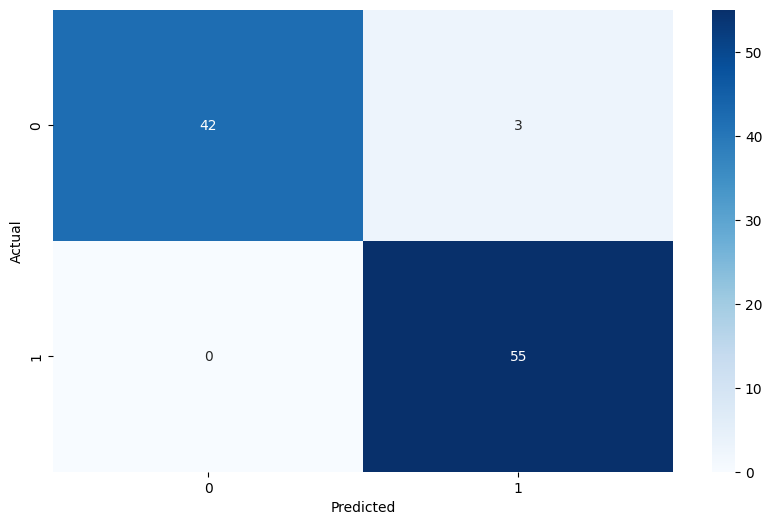

In [43]:
# Training Model 
model = LogisticRegression()
model.fit(x_train,y_train)

# Predicting Value 
y_pred = model.predict(x_test)

# Checking Accuracy 
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy*100,'%')

# Constructing Heatmap for confusion MAtrix
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()